# Azure ML Demo Notebook

This notebook demonstrates basic Azure ML operations and data science workflows.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("Libraries imported successfully!")
print(f"Current time: {datetime.now()}")

Libraries imported successfully!
Current time: 2025-09-27 00:10:58.696330


In [2]:
# Create sample data for demonstration
np.random.seed(42)
data = {
    'feature_1': np.random.normal(0, 1, 100),
    'feature_2': np.random.normal(2, 1.5, 100),
    'feature_3': np.random.exponential(1, 100),
    'target': np.random.choice([0, 1], 100)
}

df = pd.DataFrame(data)
print("Sample dataset created:")
print(df.head())
print(f"\nDataset shape: {df.shape}")

Sample dataset created:
   feature_1  feature_2  feature_3  target
0   0.496714  -0.123056   2.098609       0
1  -0.138264   1.369032   1.350034       1
2   0.647689   1.485928   1.194074       0
3   1.523030   0.796584   1.212288       0
4  -0.234153   1.758071   0.445492       0

Dataset shape: (100, 4)


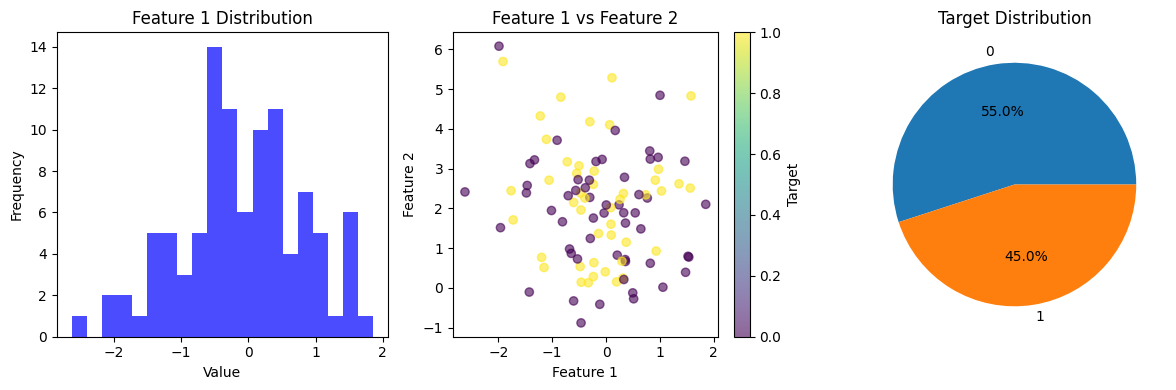

In [3]:
# Data visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Feature distributions
plt.subplot(1, 3, 1)
plt.hist(df['feature_1'], bins=20, alpha=0.7, color='blue')
plt.title('Feature 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Subplot 2: Feature correlation
plt.subplot(1, 3, 2)
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'], cmap='viridis', alpha=0.6)
plt.title('Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Target')

# Subplot 3: Target distribution
plt.subplot(1, 3, 3)
target_counts = df['target'].value_counts()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution')

plt.tight_layout()
plt.show()

Dataset Statistics:
        feature_1   feature_2   feature_3  target
count  100.000000  100.000000  100.000000  100.00
mean    -0.103847    2.033457    0.877129    0.45
std      0.908168    1.430503    0.754932    0.50
min     -2.619745   -0.878157    0.014498    0.00
25%     -0.600906    0.791509    0.325272    0.00
50%     -0.126956    2.126161    0.732472    0.00
75%      0.405952    2.807256    1.210985    1.00
max      1.852278    6.080254    3.723557    1.00

Correlation Matrix:
           feature_1  feature_2  feature_3    target
feature_1   1.000000  -0.136422  -0.036846 -0.051421
feature_2  -0.136422   1.000000   0.087176  0.125060
feature_3  -0.036846   0.087176   1.000000  0.020947
target     -0.051421   0.125060   0.020947  1.000000


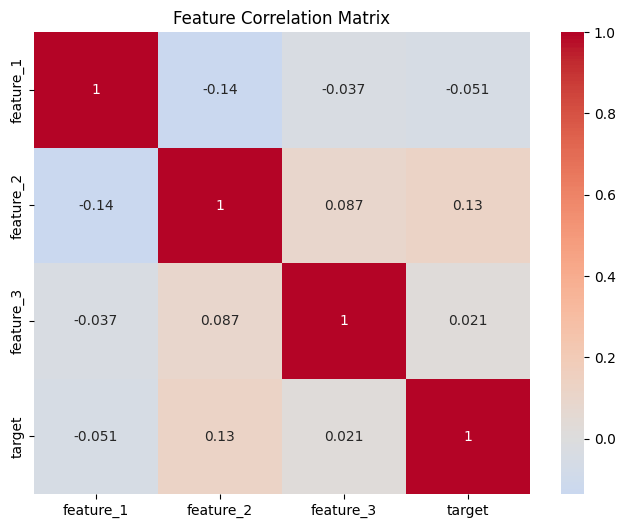

In [4]:
# Basic statistics and data analysis
print("Dataset Statistics:")
print("=" * 50)
print(df.describe())

print("\nCorrelation Matrix:")
print("=" * 50)
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
# Simple machine learning example
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target
X = df[['feature_1', 'feature_2', 'feature_3']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.500

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.43      0.33      0.38         9

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.49      0.50      0.49        20



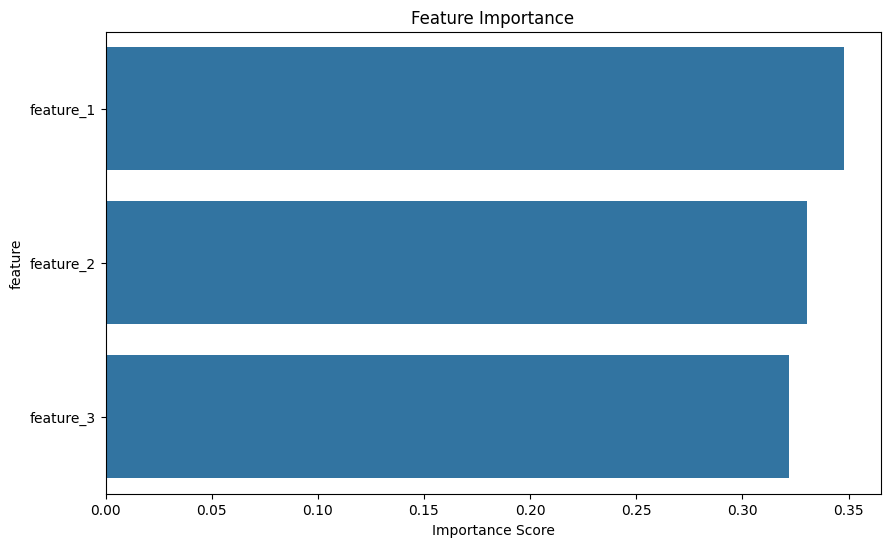

Feature Importance:
     feature  importance
0  feature_1    0.347644
1  feature_2    0.330226
2  feature_3    0.322130


In [6]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

print("Feature Importance:")
print(feature_importance)

## Azure ML Integration Example

Below is an example of how you might integrate with Azure ML services:

In [7]:
# Azure ML integration example (commented out as it requires Azure credentials)
# from azureml.core import Workspace, Experiment, Environment
# from azureml.core.model import Model

print("Azure ML Integration Example:")
print("=" * 40)
print("1. Connect to Azure ML Workspace")
print("2. Create or get an Experiment")
print("3. Submit training runs")
print("4. Register and deploy models")
print("5. Monitor model performance")

# Example configuration that would be used:
config = {
    "subscription_id": "your-subscription-id",
    "resource_group": "your-resource-group",
    "workspace_name": "your-workspace-name"
}

print(f"\nExample config: {config}")
print("\n✅ Notebook execution completed successfully!")

Azure ML Integration Example:
1. Connect to Azure ML Workspace
2. Create or get an Experiment
3. Submit training runs
4. Register and deploy models
5. Monitor model performance

Example config: {'subscription_id': 'your-subscription-id', 'resource_group': 'your-resource-group', 'workspace_name': 'your-workspace-name'}

✅ Notebook execution completed successfully!
